* A pipeline to which you feed an mri image and
 spits out muscle predictions and lever arms.

In [1]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
from mri_project.custom_imports import *
import mri_project.muscle_detector as md
import mri_project.contour_ops as cntop
from mri_project import pipeline
import mri_project.utility as ut
from mri_project.notebooks import n2021_01_30_connor_lever_arms as nb

In [94]:
root = "/home/bzr0014/git/idea_mri_project/data/old/connor_images/"
connor_images_root = root
files = ut.get_all_images(connor_images_root, extension='jpg')[:10]

In [97]:
dic = nb.compute_lever_arms_for_trace_file(files[0], angles=(45, 90, 135, 180))

/home/bzr0014/git/idea_mri_project/data/old/connor_images/INTERVENTION/CO9/3-CO9-6BEH.jpg
(1664, 2224, 3)


In [102]:
# file = "/home/bzr0014/git/idea_mri_project/data/connor_images/INTERVENTION/CO7ikB/4-CO7B-14BEH.jpg"
for file in files:
    imgs = nb.compute_lever_arms_for_trace_file(file, angles=(45, 90, 135, 180))
    nb.save_img_dict(imgs, ut.replace_path(file, connor_images_root, "../data/connor_lever_arms/CONTROL W SURVEY/"))

/home/bzr0014/git/idea_mri_project/data/old/connor_images/INTERVENTION/CO9/3-CO9-6BEH.jpg
(1664, 2224, 3)


# Appendix

In [116]:
t = md.MuscleDetector(files[0], files[0], traced_image=files[0])

(1664, 2224, 3)


In [117]:
t.get_traced_binary_mask()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

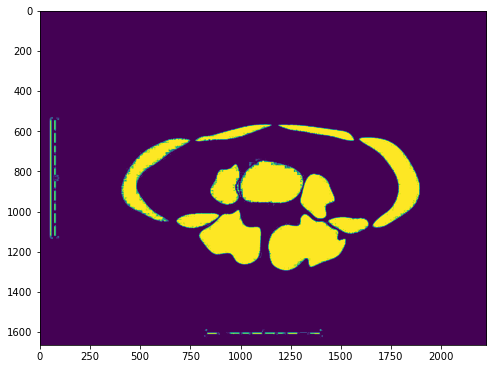

In [118]:
plt.imshow(t.traced_binary_mask)

In [119]:
t.traced_lever_arm_images

{}

In [122]:
t.get_traced_contours(90)

In [123]:
t.traced_lever_arm_images

{45: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 90: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])}

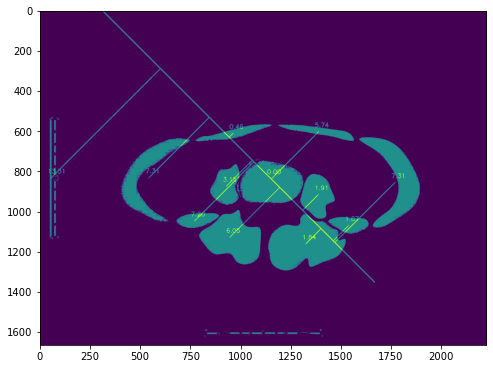

In [124]:
plt.imshow(t.traced_lever_arm_images[45])